# ANÁLISES GRID DE BEST ESTIMATOR

Mejores algoritmos propuestos por LazyPredict:

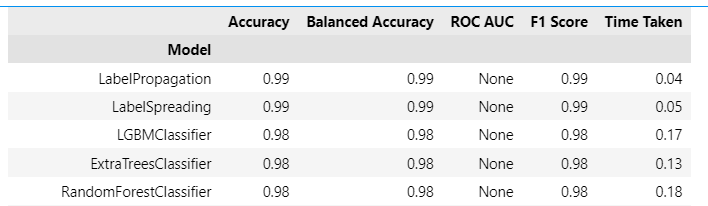

## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#Modelos

from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Optimizar modelo
from sklearn.model_selection import GridSearchCV

#Métricas de evaluación
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle


## IMPORTACIÓN DE DATOS

### Cargar los datos

In [2]:
df_tablon = pd.read_pickle('../../02_Datos/03_Trabajo/tablon_analitico.pickle')
df_tablon.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-63,-60,-60,-67,-76,-85,-84,1
2,-61,-60,-68,-62,-77,-90,-80,1
3,-63,-65,-60,-63,-77,-81,-87,1
4,-64,-55,-63,-66,-76,-88,-83,1


### Separar predictoras y target

In [3]:
x = df_tablon.drop(columns= 'room').copy()
y = df_tablon.room.copy()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## MODELIZAR

### RESERVAR EL DATASET DE VALIDACION

In [5]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state=1)

### CREAR PIPE Y EL DICCIONARIO CON LOS ALGORITMOS, PARÁMETROS Y VALORES

In [6]:
pipe = Pipeline([('algoritmo',XGBClassifier())])

grid = [

        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100, 200, 300]}
]

### OPTIMIZAR LOS HIPERPARÁMETROS

In [7]:
grid_search = GridSearchCV(estimator= pipe,
                           param_grid= grid,
                           cv=4,
                           scoring= 'accuracy',
                           verbose=0,
                           n_jobs= -1)

modelo = grid_search.fit(train_x, train_y)
pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__learning_rate,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__reg_alpha,param_algoritmo__reg_lambda,param_algoritmo__verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
313,0.895499,0.038765,0.009994,0.003460,"XGBClassifier(base_score=None, booster=None, c...",0.05,20,300,-1,0,0.1,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.991837,0.975510,0.991837,0.971429,0.982653,0.009296,1
312,0.908815,0.034277,0.008999,0.001736,"XGBClassifier(base_score=None, booster=None, c...",0.05,20,300,-1,0,0.01,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.991837,0.975510,0.991837,0.971429,0.982653,0.009296,1
264,0.703715,0.016328,0.010068,0.003588,"XGBClassifier(base_score=None, booster=None, c...",0.05,10,200,-1,0,0.01,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.991837,0.975510,0.991837,0.971429,0.982653,0.009296,1
276,0.896375,0.005798,0.007756,0.000431,"XGBClassifier(base_score=None, booster=None, c...",0.05,10,300,-1,0,0.01,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.991837,0.975510,0.991837,0.971429,0.982653,0.009296,1
337,0.522213,0.014449,0.006997,0.001727,"XGBClassifier(base_score=None, booster=None, c...",0.1,5,200,-1,0,0.1,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.991837,0.975510,0.987755,0.975510,0.982653,0.007287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.452754,0.014683,0.005999,0.003463,"XGBClassifier(base_score=None, booster=None, c...",0.01,20,100,-1,0.5,1,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.983673,0.967347,0.971429,0.963265,0.971429,0.007636,420
47,0.528786,0.018406,0.014388,0.011460,"XGBClassifier(base_score=None, booster=None, c...",0.01,10,100,-1,1,1,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.983673,0.967347,0.971429,0.963265,0.971429,0.007636,420
9,0.536634,0.121156,0.006368,0.003390,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,1,0.01,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.983673,0.963265,0.975510,0.963265,0.971429,0.008658,420
10,0.540361,0.134260,0.015658,0.013340,"XGBClassifier(base_score=None, booster=None, c...",0.01,5,100,-1,1,0.1,0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.983673,0.959184,0.975510,0.963265,0.970408,0.009734,431


In [8]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [9]:
modelo.best_params_

{'algoritmo': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=-1, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'algoritmo__learning_rate': 0.05,
 'algoritmo__max_depth': 10,
 'algoritmo__n_estimators': 200,
 'algoritmo__n_jobs': -1,
 'algoritmo__reg_alpha': 0,
 'algoritmo__reg_lambda': 0.01,
 'algoritmo__verbosity': 0}

In [10]:
modelo.best_score_

0.9826530612244898

### GUARDAR MODELO.BEST_ESTIMATOR Y PARÁMETROS

In [11]:
modelo_best_estimator = modelo

#### Guardamos modelo, parámetros y score

In [12]:
m_best_estimator = str(modelo.best_estimator_[0])
m_best_estimator = m_best_estimator.split('(')[0]
m_best_params = str(modelo.best_params_)
m_best_score = str(modelo.best_score_)

## EVALUAR

### PREDECIR Y EVALUAR SOBRE EL TRAIN

### Predecir sobre Train

In [13]:
pred = modelo.best_estimator_.predict(train_x)

### Evaluar sobre el Train

In [14]:
t_accuracy = accuracy_score(train_y, pred)
t_report = classification_report(train_y, pred)

print(f"Accuracy: {t_accuracy}")
print(f"Classification Report:\n{t_report}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       243
           3       1.00      1.00      1.00       255

    accuracy                           1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980



### PREDECIR Y EVALUAR SOBRE LA VALIDACIÓN

#### Predecir sobre la validación

In [15]:
pred = modelo.best_estimator_.predict(val_x)

Evaluar sobre la validación

In [16]:
v_accuracy = accuracy_score(val_y, pred)
v_report = classification_report(val_y, pred)

print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Accuracy: 0.9809523809523809
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.96      0.97      0.96        95
           2       0.96      0.96      0.96       107
           3       1.00      1.00      1.00       108

    accuracy                           0.98       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.98      0.98      0.98       420



#### Gráfico entre la diferencia entre la validación y el original

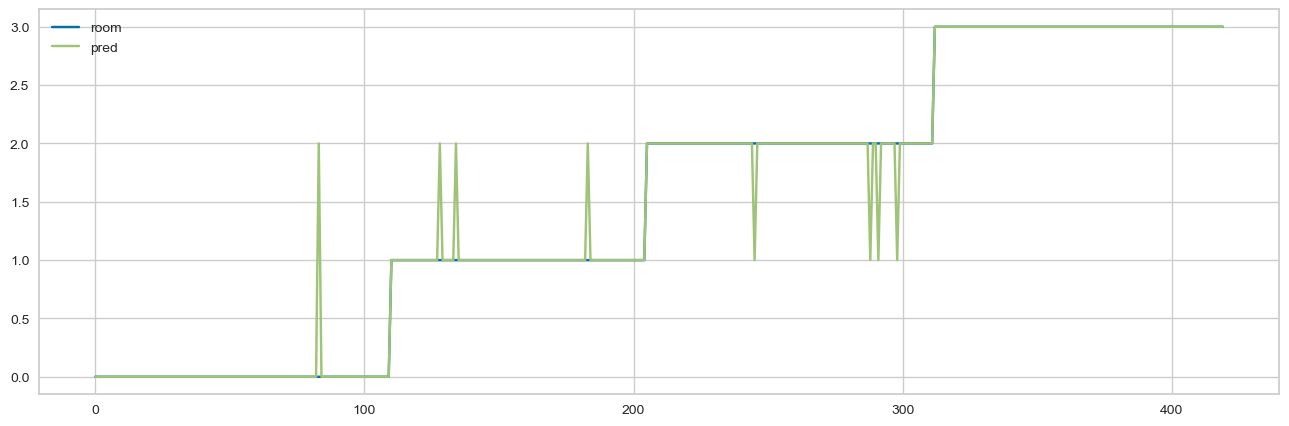

In [33]:
test_y = pd.Series(val_y).to_frame()
test_y.rename(columns= {0:'room'}, inplace= True)
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='room').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred[['room','pred']].plot(figsize=(16,5));

## REPORTING DEL MODELO

Matrix de Confusión MultiClass

Text(0.5, 1.0, 'Confusion Matrix')

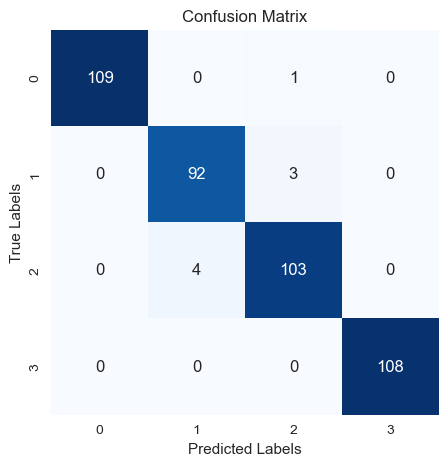

In [35]:
# Calcular la matriz de confusión
cm = confusion_matrix(val_y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")


ROC CHART MULTICLASS

c:\Users\ialca\anaconda3\envs\proyecto1\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


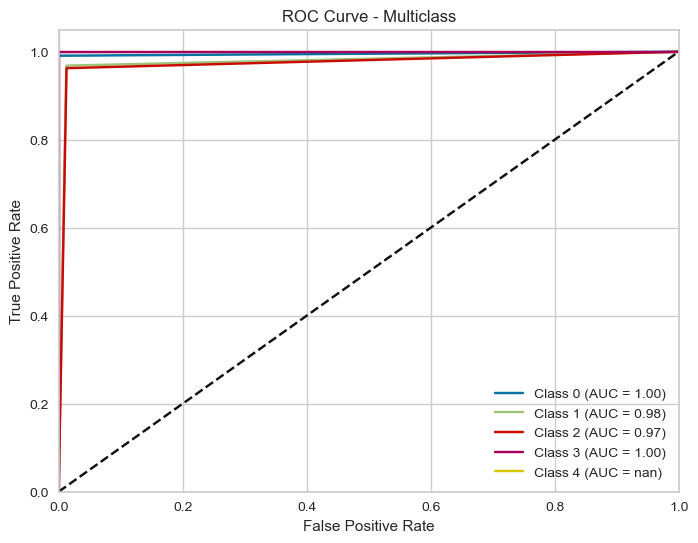

In [36]:
# Binarizar las etiquetas verdaderas y las predicciones para cada clase
n_classes = len(np.unique(val_y))+1
binarized_val_y = label_binarize(val_y, classes=np.arange(n_classes))
binarized_pred = label_binarize(pred, classes=np.arange(n_classes))

# Calcular la curva ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_val_y[:, i], binarized_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotear el gráfico ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right");

## GUARDAR BEST_ESTIMATOR, PARÁMETROS Y RESULTADOS DEL TEST Y LA VALIDACIÓN

#### Guardar el mejor estimador

In [37]:
version_estimator = '_v04'
nombre_best_estimator = m_best_estimator + version_estimator + '.pickle'
nombre_best_estimator

'XGBClassifier_v04.pickle'

In [38]:
m_best_estimator

'XGBClassifier'

In [39]:
ruta_pipe_entrenamiento = '../../04_Modelos/Best_estimator/' + nombre_best_estimator

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(modelo_best_estimator, file)


In [44]:
# Añadir comentarios sobre el modelo y definimos predictoras y target

comentarios = "Cambiamos a XGBClassifier con parámetros y labelencoder en la target"
x_columns = list(x.columns)
y_target = 'room'


In [45]:
#Cargamos la lista con los resultados
resultado  = {'m_Best_estimator': m_best_estimator,
               'm_Best_paramans' : m_best_params,
               'm_Best_Score': m_best_score, 
               't_accuracy': t_accuracy, 
               't_report': t_report, 
               'v_accuracy': v_accuracy, 
               'v_report': v_report, 
               'comentarios': comentarios,
               'predictoras_X': x_columns,
               'target_y': y_target
            }
resultado= pd.Series(resultado,name=nombre_best_estimator)
resultado

m_Best_estimator                                        XGBClassifier
m_Best_paramans     {'algoritmo': XGBClassifier(base_score=None, b...
m_Best_Score                                       0.9826530612244898
t_accuracy                                                        1.0
t_report                          precision    recall  f1-score   ...
v_accuracy                                                   0.980952
v_report                          precision    recall  f1-score   ...
comentarios         Cambiamos a XGBClassifier con parámetros y lab...
predictoras_X       [wifi1, wifi2, wifi3, wifi4, wifi5, wifi6, wifi7]
target_y                                                         room
Name: XGBClassifier_v04.pickle, dtype: object

In [46]:
df_best = pd.read_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx',index_col=0)


In [47]:
df_best = pd.concat([df_best, resultado], ignore_index= False,axis=1)
df_best.to_excel('../../04_Modelos/Best_estimator/Best_estimator.xlsx')